# Machine Learning in Business - OilyGiant Mining Company

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
In this project, I  will be demonstrating and practicing Machine Learning skills related to Business.
    
    I'll be working for the OilyGiant mining company. My task is to find the best place for a new well.
    
    
Steps to choose the location:

 - Collect the oil well parameters in the selected region: oil quality and volume of reserves;
 - Build a model for predicting the volume of reserves in the new wells;
 - Pick the oil wells with the highest estimated values;
 - Pick the region with the highest total profit for the selected oil wells.
    
    
I have data on oil samples from three regions. Parameters of each oil well in the region are already known. i will build a model that will help to pick the region with the highest profit margin. I will analyze potential profit and risks using the Bootstrapping technique.
    
Conditions for this project:

 - Only linear regression is suitable for model training (the rest are not sufficiently predictable).
 - When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
 - The budget for development of 200 oil wells is 100 USD million.
 - One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
 - After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

In [1]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Read and Analyze Datasets

#### <span style="color:green">Data Description</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
We have 3 datasets of 3 different regions. They do not have names so we'll call them 0, 1 and 2.
    
 - id — unique oil well identifier
 - f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
 - product — volume of reserves in the oil well (thousand barrels).

In [2]:
#import data
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#check data types and missing values
display(df_0.info())
display(df_1.info())
display(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [4]:
#check for duplicates
display(df_0.duplicated().sum())
display(df_1.duplicated().sum())
display(df_2.duplicated().sum())

0

0

0

In [5]:
#check for duplicate id's
display(df_0['id'].duplicated().sum())
display(df_1['id'].duplicated().sum())
display(df_2['id'].duplicated().sum())

10

4

4

In [6]:
#look into the issue
df_1[df_1['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


### Visualizations

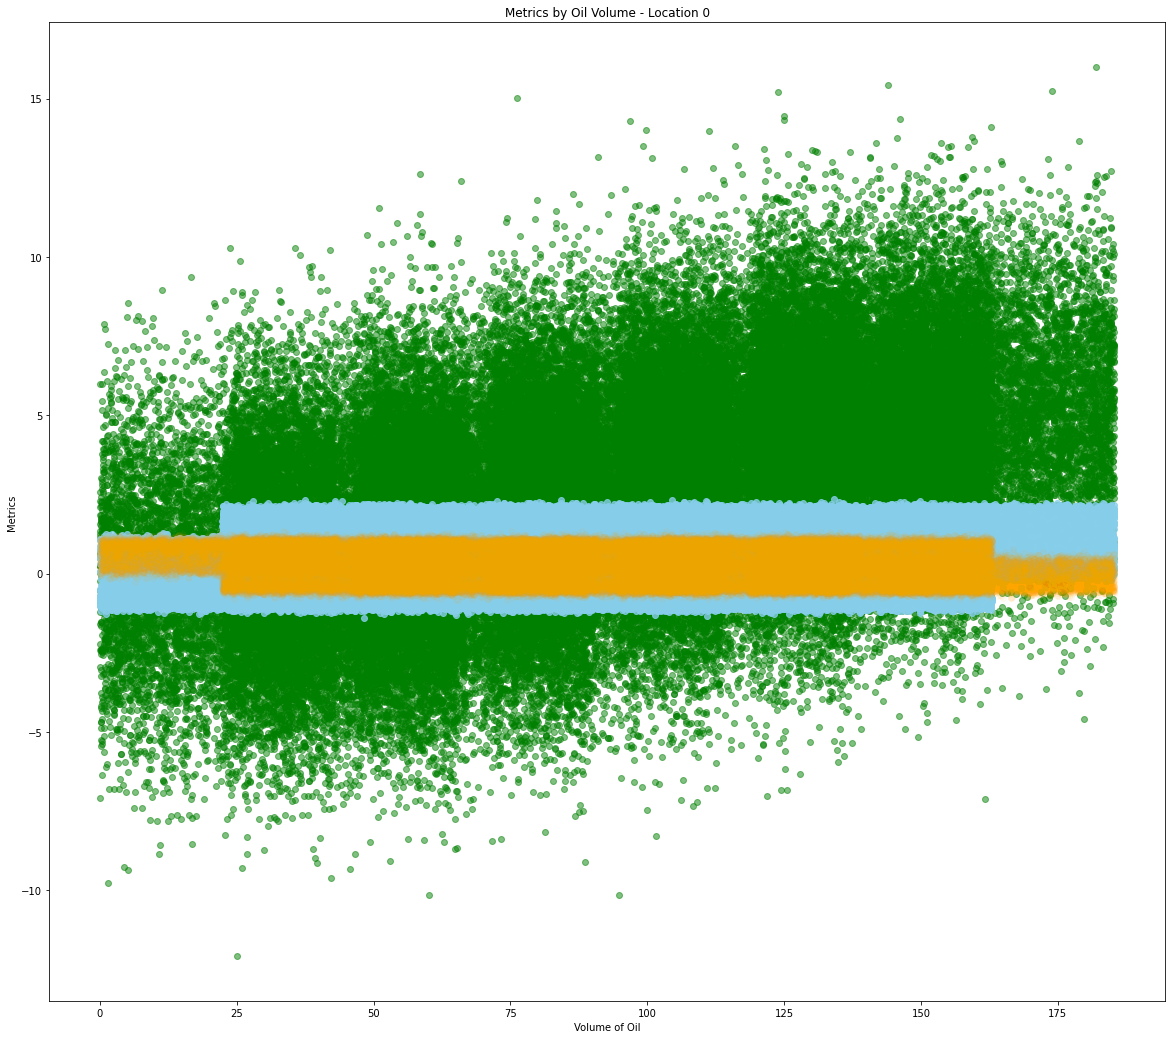

In [7]:
#Scatterplots

#scatterplot of location 0 showing each metric against the volume of oil.
plt.figure(figsize=(20, 18))

plt.scatter(df_0['product'],df_0['f2'],color='green',alpha=0.5)
plt.scatter(df_0['product'],df_0['f0'],color='skyblue',alpha=0.8)
plt.scatter(df_0['product'],df_0['f1'],color='orange',alpha=0.05)


plt.xlabel('Volume of Oil')
plt.ylabel('Metrics')
plt.title('Metrics by Oil Volume - Location 0')
plt.show()

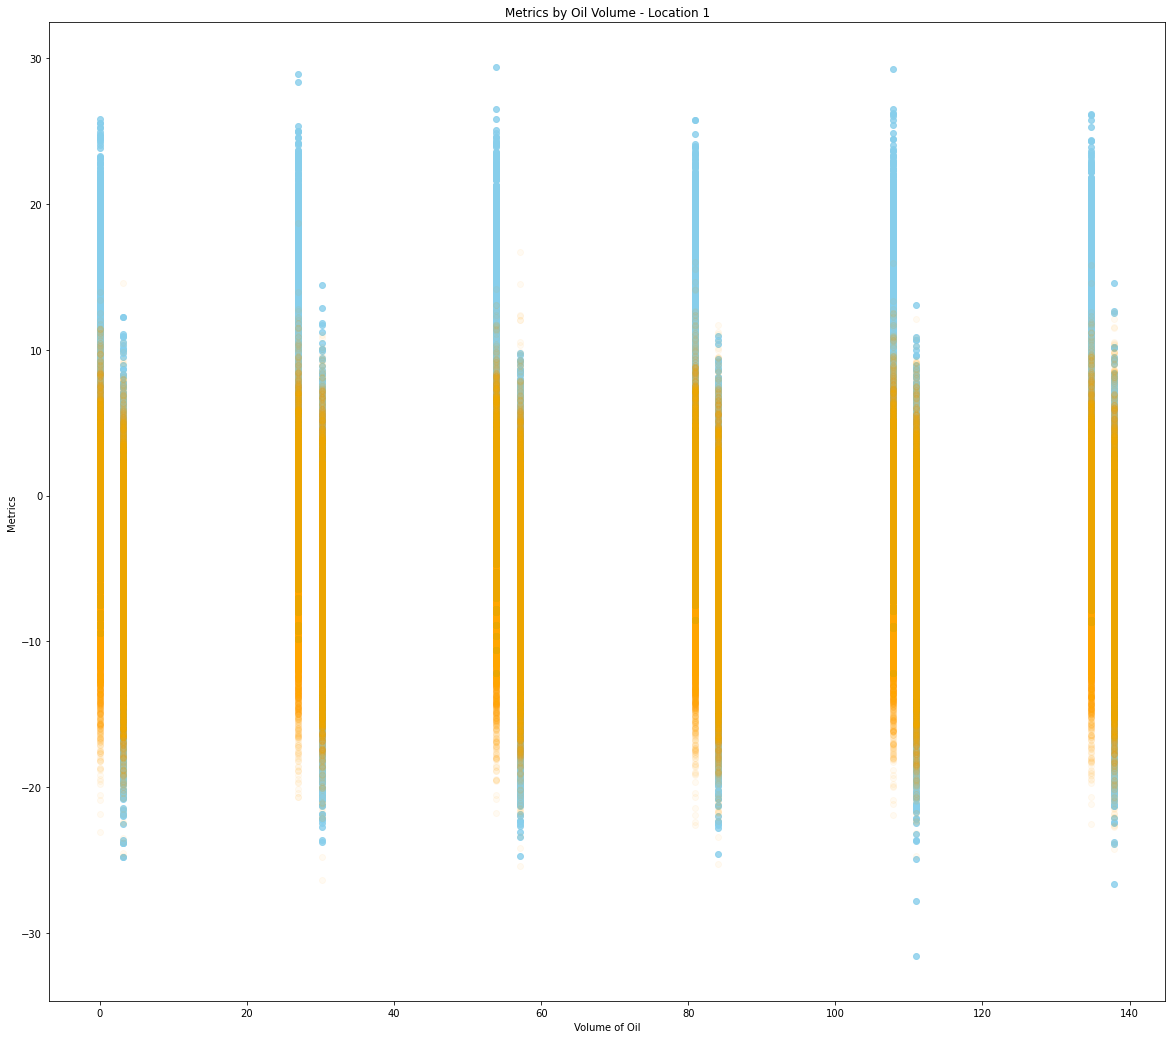

In [8]:
#scatterplot of location 0 showing each metric against the volume of oil.
plt.figure(figsize=(20, 18))

plt.scatter(df_1['product'],df_1['f2'],color='green',alpha=0.5)
plt.scatter(df_1['product'],df_1['f0'],color='skyblue',alpha=0.8)
plt.scatter(df_1['product'],df_1['f1'],color='orange',alpha=0.05)


plt.xlabel('Volume of Oil')
plt.ylabel('Metrics')
plt.title('Metrics by Oil Volume - Location 1')
plt.show()

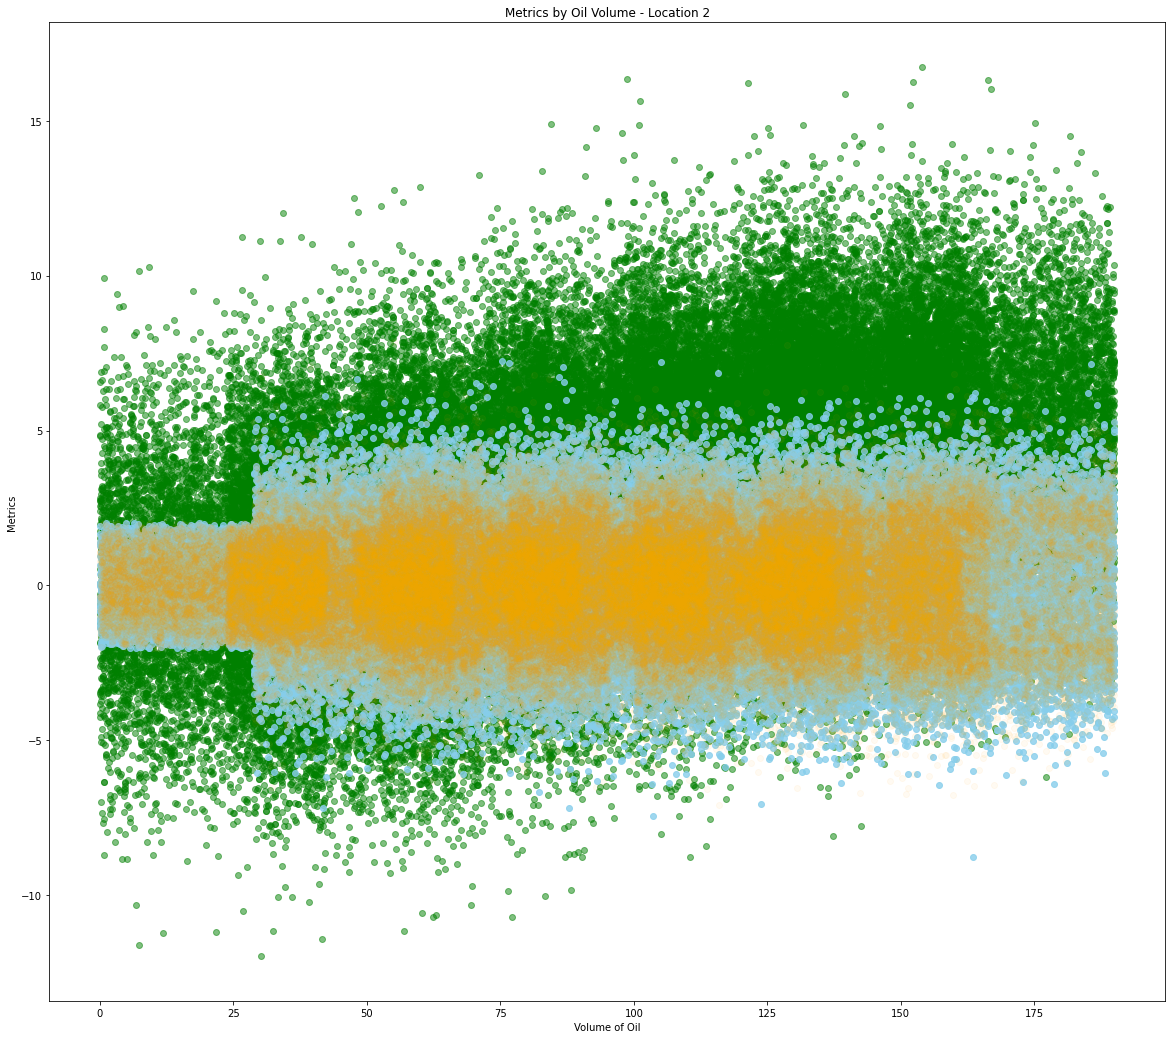

In [9]:

#scatterplot of location 2 showing each metric against the volume of oil.
plt.figure(figsize=(20, 18))
plt.scatter(df_2['product'],df_2['f2'],color='green',alpha=0.5)
plt.scatter(df_2['product'],df_2['f0'],color='skyblue',alpha=0.8)
plt.scatter(df_2['product'],df_2['f1'],color='orange',alpha=0.05)



plt.xlabel('Volume of Oil')
plt.ylabel('Metrics')
plt.title('Metrics by Oil Volume - Location 2')
plt.show()

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
These scatter plots show that all 3 locations have very differing distributions of data. The f values of location 1 look to be correlated to the oil volume and locations 0 and 2 have the same spread of f2 values and somewhat similar distributions of f0 and f1 values although location 0 has a much tighter spread

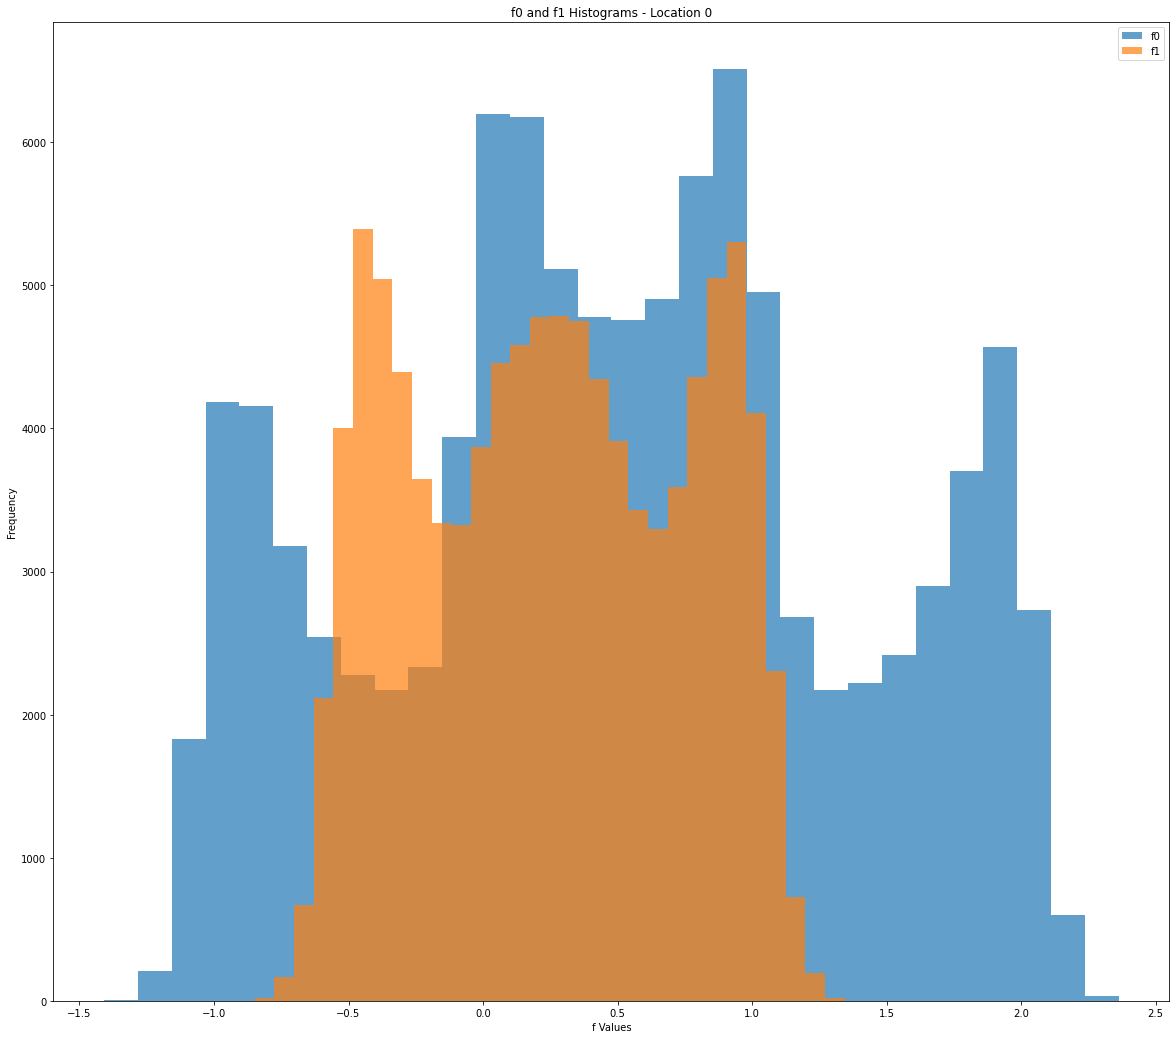

In [10]:
# Histograms

#create histograms for each location to show the distributions of f values. Location 0
plt.figure(figsize=(20, 18))

plt.hist(df_0['f0'], bins=30, alpha=0.7, label='f0')
plt.hist(df_0['f1'], bins=30, alpha=0.7, label='f1')
#plt.hist(df_0['f2'], bins=30, alpha=0.7, label='f2')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('f Values')
plt.ylabel('Frequency')
plt.title('f0 and f1 Histograms - Location 0')

# Show plot
plt.show()

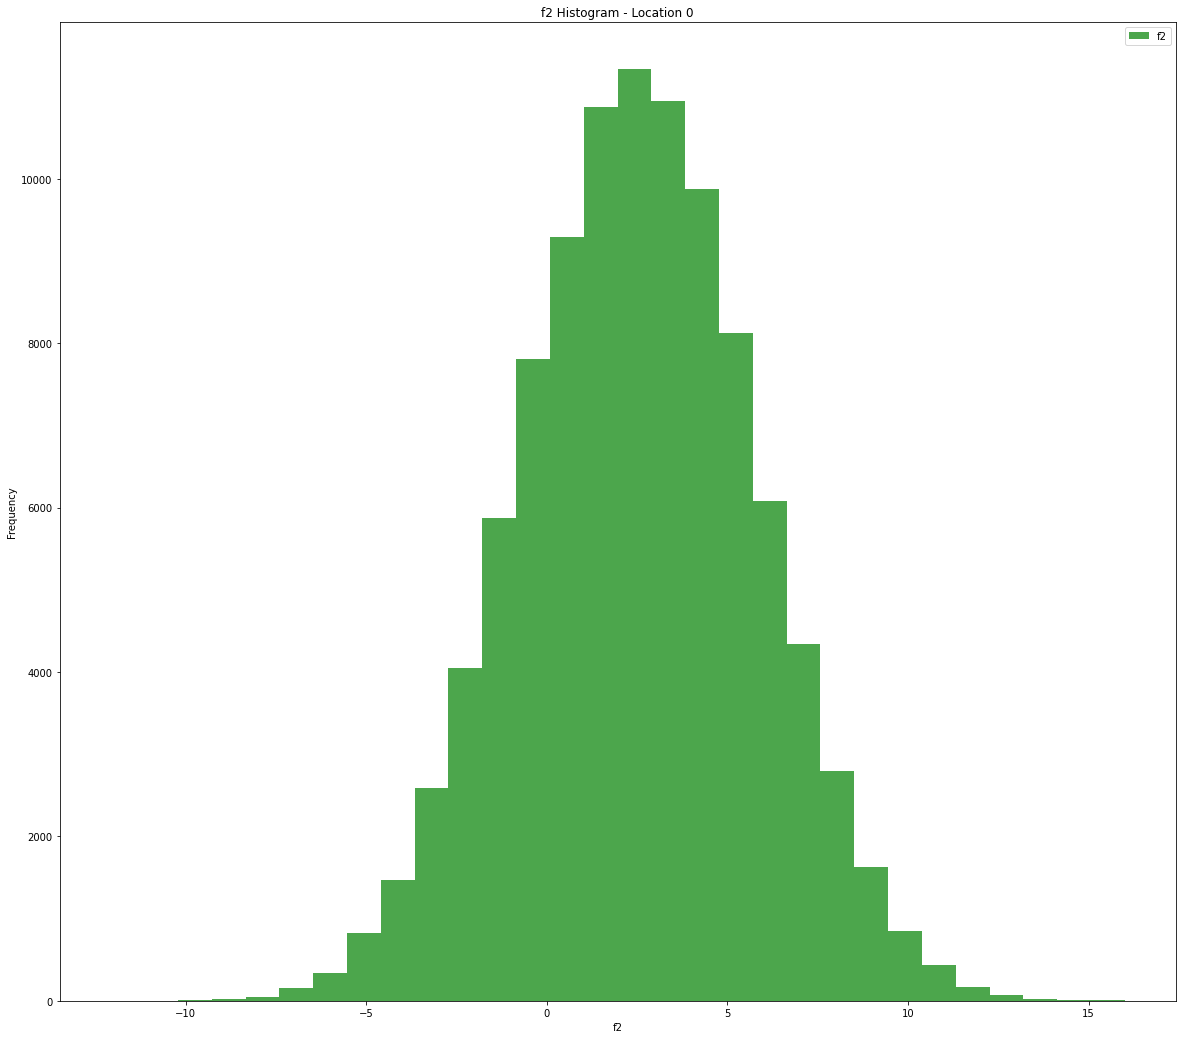

In [11]:
# f2 location 0
plt.figure(figsize=(20, 18))

plt.hist(df_0['f2'], bins=30, alpha=0.7, label='f2', color='green')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.title('f2 Histogram - Location 0')

# Show plot
plt.show()

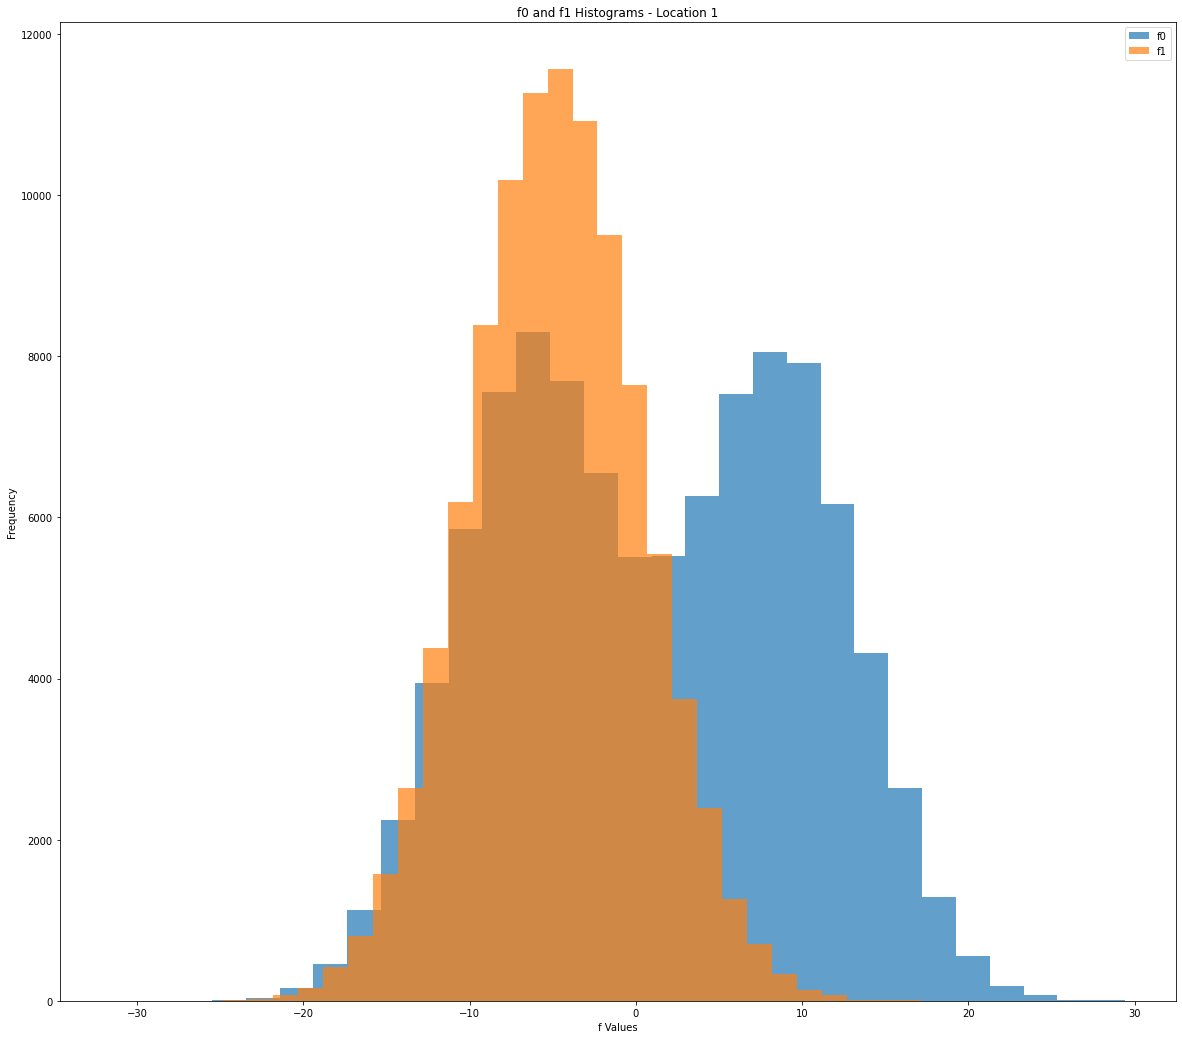

In [12]:
#f0 and f1 - location 1
plt.figure(figsize=(20, 18))

plt.hist(df_1['f0'], bins=30, alpha=0.7, label='f0')
plt.hist(df_1['f1'], bins=30, alpha=0.7, label='f1')
#plt.hist(df_0['f2'], bins=30, alpha=0.7, label='f2')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('f Values')
plt.ylabel('Frequency')
plt.title('f0 and f1 Histograms - Location 1')

# Show plot
plt.show()

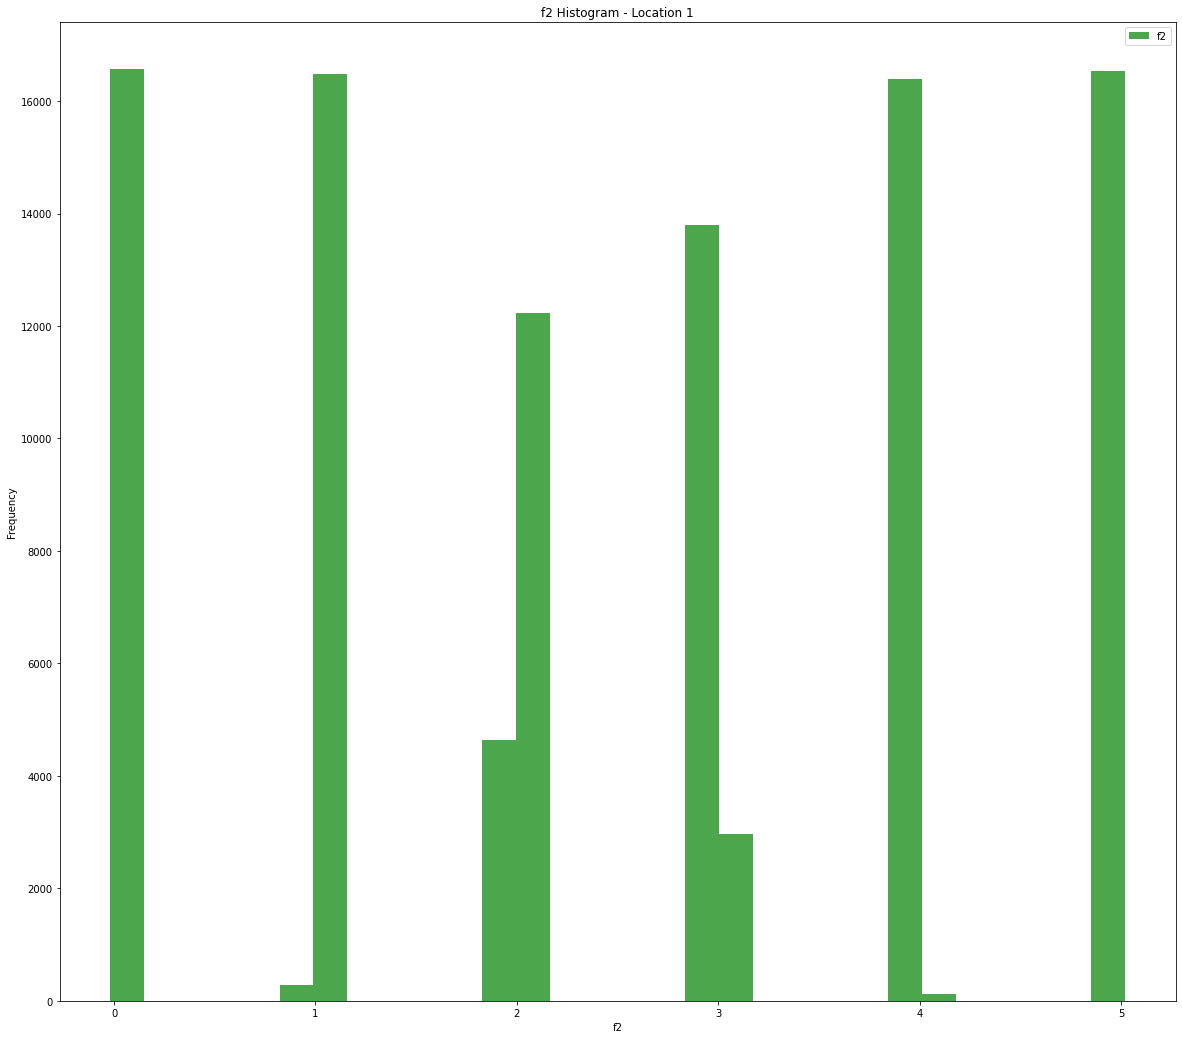

In [13]:
# f2 location 1
plt.figure(figsize=(20, 18))

plt.hist(df_1['f2'], bins=30, alpha=0.7, label='f2', color='green')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.title('f2 Histogram - Location 1')

# Show plot
plt.show()

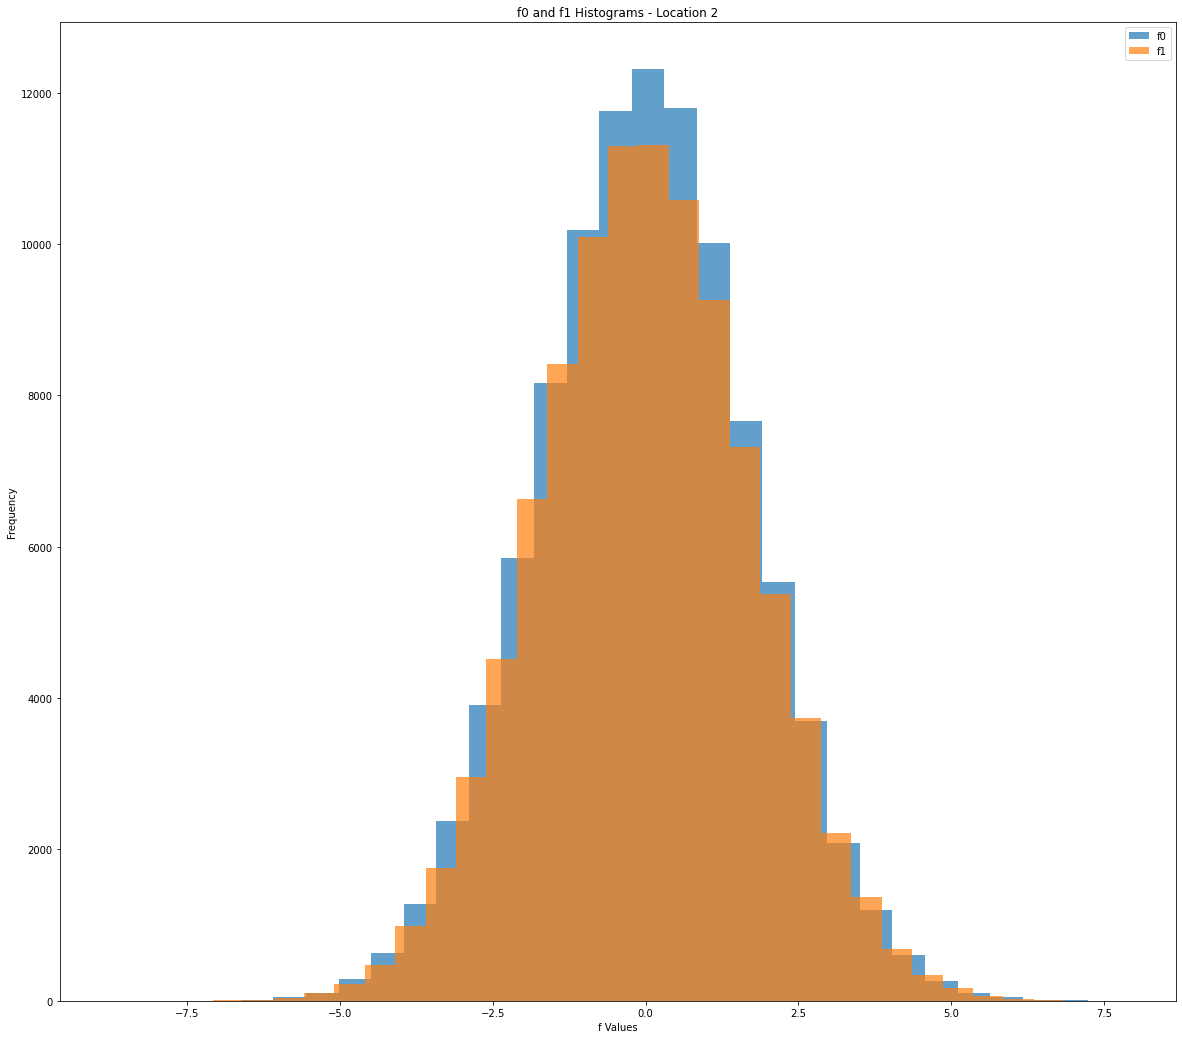

In [14]:
#f0 and f1 - location 2
plt.figure(figsize=(20, 18))

plt.hist(df_2['f0'], bins=30, alpha=0.7, label='f0')
plt.hist(df_2['f1'], bins=30, alpha=0.7, label='f1')
#plt.hist(df_0['f2'], bins=30, alpha=0.7, label='f2')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('f Values')
plt.ylabel('Frequency')
plt.title('f0 and f1 Histograms - Location 2')

# Show plot
plt.show()

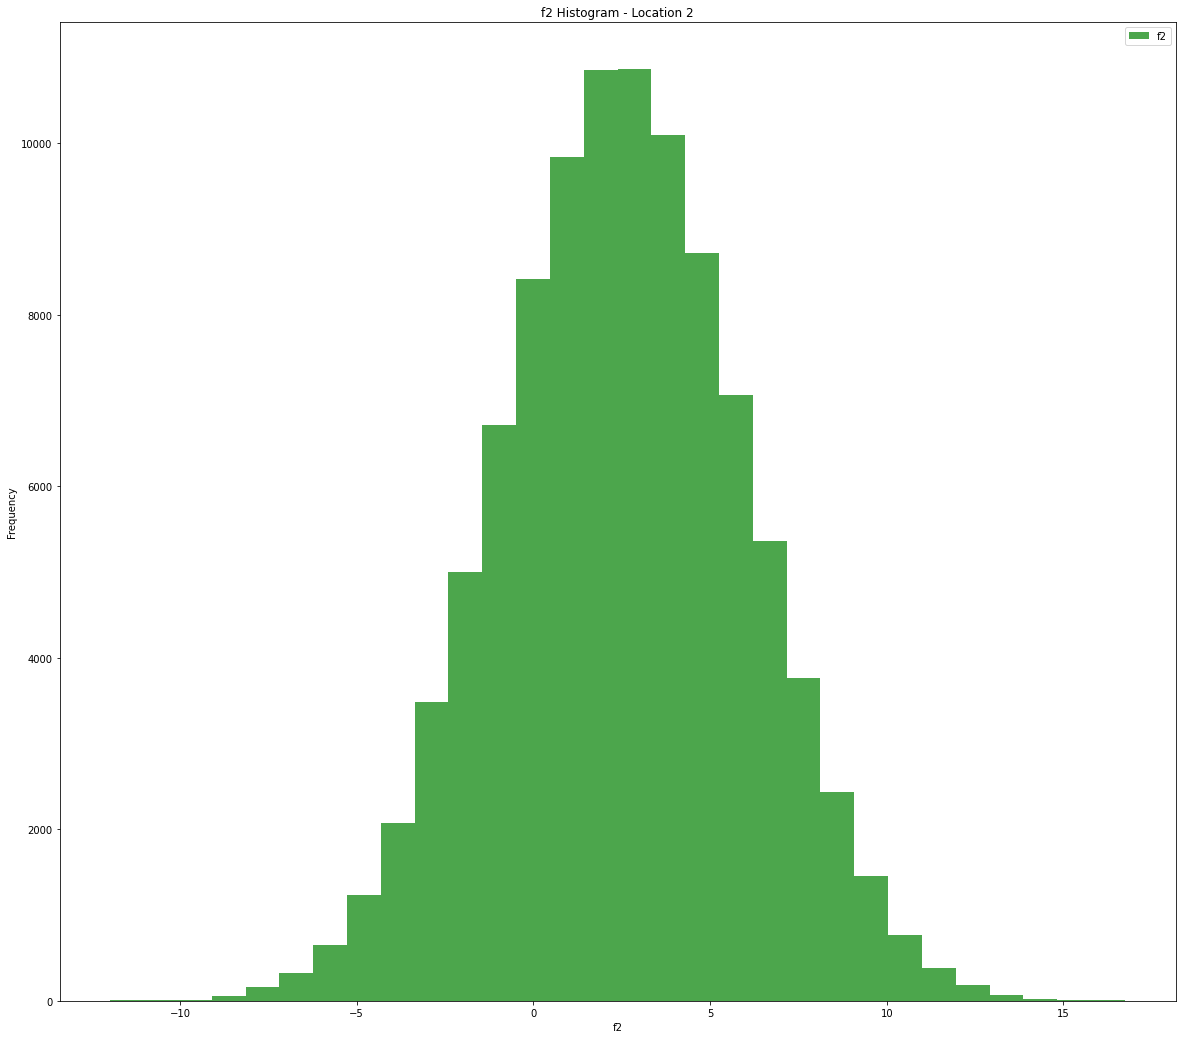

In [15]:
# f2 location 2
plt.figure(figsize=(20, 18))

plt.hist(df_2['f2'], bins=30, alpha=0.7, label='f2', color='green')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.title('f2 Histogram - Location 2')

# Show plot
plt.show()

In [16]:
#statistics of each dataframe

#create a function to display the statistics for any given dataframe
def statistics(df):
    print('Statistics')
    print()
    print('f0 Mean: ',df['f0'].mean())
    print('f0 Variance: ',df['f0'].var())
    print('f0 Standard Deviation: ',df['f0'].std())
    print()
    print('f1 Mean: ',df['f1'].mean())
    print('f1 Variance: ',df['f1'].var())
    print('f1 Standard Deviation: ',df['f1'].std())
    print()
    print('f2 Mean: ',df['f2'].mean())
    print('f2 Variance: ',df['f2'].var())
    print('f2 Standard Deviation: ',df['f2'].std())
    print()
    print('product Mean: ',df['product'].mean())
    print('product Variance: ',df['product'].var())
    print('product Standard Deviation: ',df['product'].std())
    print()

In [17]:
statistics(df_0)
statistics(df_1)
statistics(df_2)

Statistics

f0 Mean:  0.5004193306434167
f0 Variance:  0.760091047648561
f0 Standard Deviation:  0.8718320065520426

f1 Mean:  0.25014302801754934
f1 Variance:  0.2544523207691106
f1 Standard Deviation:  0.5044326721863985

f2 Mean:  2.5026469402575238
f2 Variance:  10.551112791648592
f2 Standard Deviation:  3.248247649371672

product Mean:  92.50000000000001
product Variance:  1961.4881626155964
product Standard Deviation:  44.288691136853394

Statistics

f0 Mean:  1.1412958353989027
f0 Variance:  80.38792768311804
f0 Standard Deviation:  8.965931501139078

f1 Mean:  -4.796579148792222
f1 Variance:  26.213085525135398
f1 Standard Deviation:  5.119871631704783

f2 Mean:  2.494541252382821
f2 Variance:  2.9021559169080797
f2 Standard Deviation:  1.7035715179903894

product Mean:  68.82500000000002
product Variance:  2110.889995152314
product Standard Deviation:  45.94442289497512

Statistics

f0 Mean:  0.0020226967336621432
f0 Variance:  2.999979549772851
f0 Standard Deviation:  1.73204

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
There are a few duplicate id codes in each dataset. These duplicates, however, have different properties and should have both records included for each. In a real life situation, we would want to ask the owner of the data how to handle these duplicates, but for now, I would say we should keep them.
    
Based on the visualizations, it's hard to tell what they mean since we don't have information on the meaning of the 3 f values, but from looking at them, we can see that most of this data is normally distributed.
    
From our Statistics view, we can see that the f values for each region differ greatly other than the product column and the mean values of the f2 column. The f2 values of location 1 are interesting because all of them are floats that are very close to whole numbers, which explains why the histogram looks the way it does.
    
    The rest of the data looks good. There weren't many corrections to make and the data is ready for model training.

## Preprocessing

In [18]:
#Prepare data to be trained by model

#we don't need the id column for our predictions
df_0 = df_0.drop(['id'],axis=1)
df_1 = df_1.drop(['id'],axis=1)
df_2 = df_2.drop(['id'],axis=1)

In [19]:
features_l0 = df_0.drop(['product'],axis=1)
target_l0 = df_0['product']

features_l1 = df_1.drop(['product'],axis=1)
target_l1 = df_1['product']

features_l2 = df_2.drop(['product'],axis=1)
target_l2 = df_2['product']

In [20]:
# split features and target into train, test, and validation datasets. Using a 3-1-1 split for this.
features_train_l0, features_valid_l0, target_train_l0, target_valid_l0 = train_test_split(features_l0,target_l0,
                                                                         test_size=0.25,
                                                                         random_state=12345)

In [21]:
features_train_l1, features_valid_l1, target_train_l1, target_valid_l1 = train_test_split(features_l1,target_l1,
                                                                         test_size=0.25,
                                                                         random_state=12345)

In [22]:
features_train_l2, features_valid_l2, target_train_l2, target_valid_l2 = train_test_split(features_l2,target_l2,
                                                                         test_size=0.25,
                                                                         random_state=12345)

## Machine Learning

In [23]:
#Using a linear regression model - location 0
model_l0 = LinearRegression()
model_l0.fit(features_train_l0,target_train_l0)
predictions_l0 = model_l0.predict(features_valid_l0)

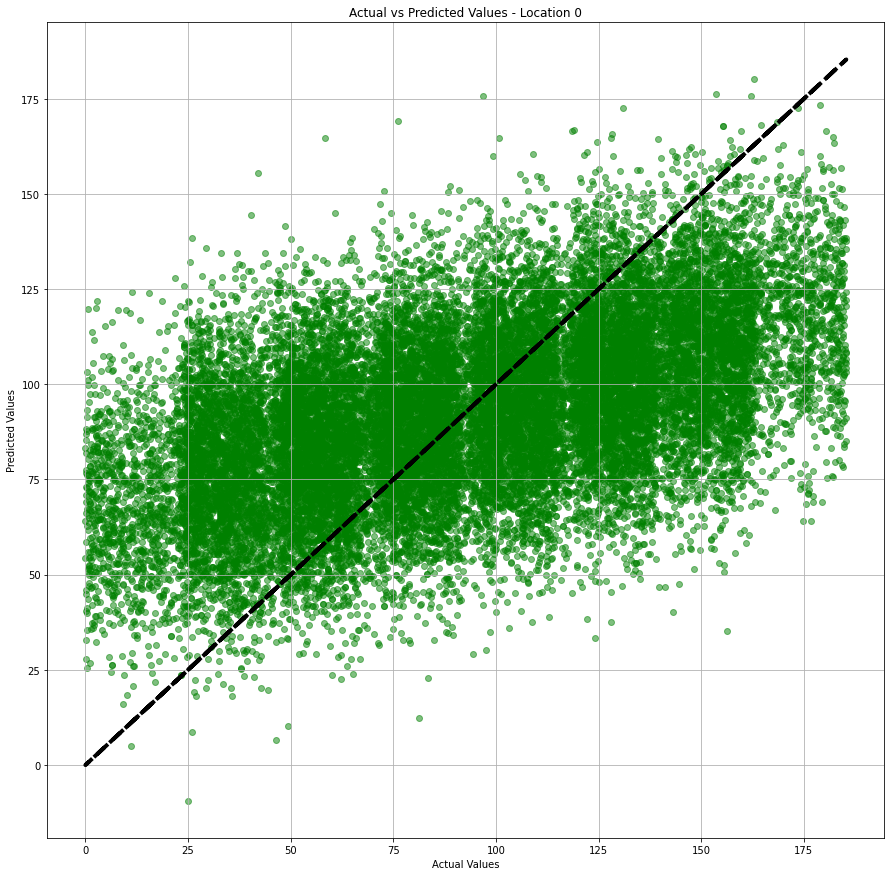

In [24]:
# Create a scatter plot to compare actual vs predicted
plt.figure(figsize=[15,15])
plt.scatter(target_valid_l0, predictions_l0, color='green', alpha=0.5)

# Add a line representing perfect predictions (y = x)
plt.plot(target_valid_l0, target_valid_l0, color='black',linestyle='dashed',linewidth=4)

# Add labels and title
plt.grid(True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Location 0')

# Show plot
plt.show()

In [25]:
#Using a linear regression model - location 1
model_l1 = LinearRegression()
model_l1.fit(features_train_l1,target_train_l1)
predictions_l1 = model_l1.predict(features_valid_l1)

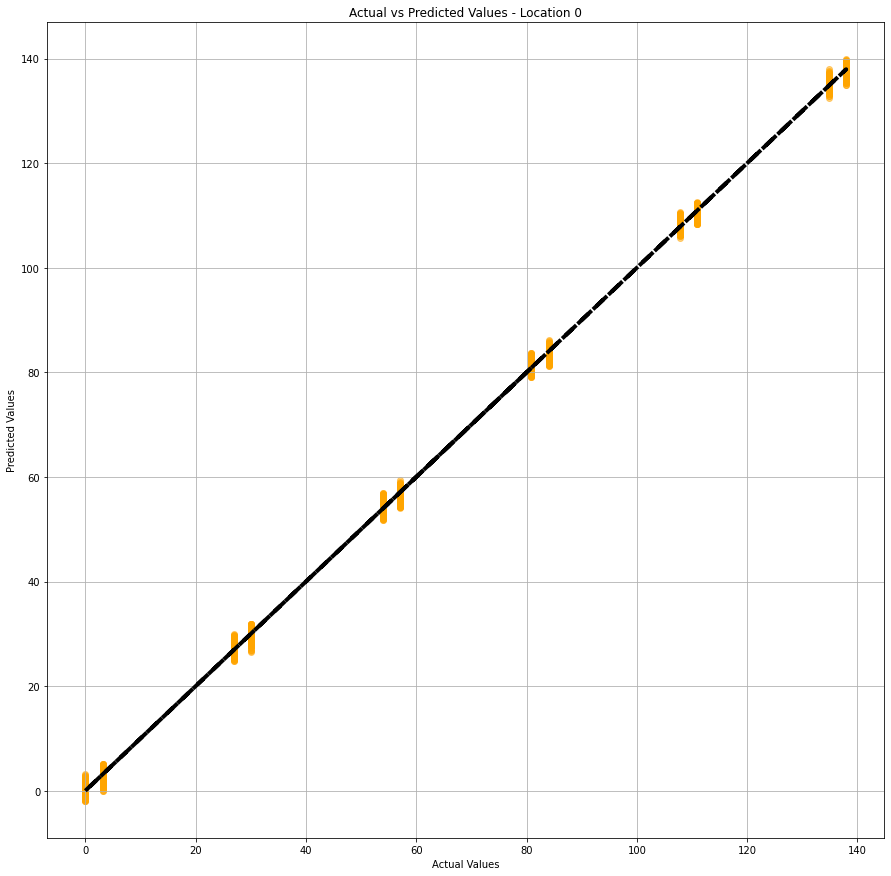

In [26]:
# Create a scatter plot to compare actual vs predicted
plt.figure(figsize=[15,15])
plt.scatter(target_valid_l1, predictions_l1, color='orange', alpha=0.5)

# Add a line representing perfect predictions (y = x)
plt.plot(target_valid_l1, target_valid_l1, color='black',linestyle='dashed',linewidth=4)

# Add labels and title
plt.grid(True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Location 0')

# Show plot
plt.show()

In [27]:
#Using a linear regression model - location 2
model_l2 = LinearRegression()
model_l2.fit(features_train_l2,target_train_l2)
predictions_l2 = model_l2.predict(features_valid_l2)

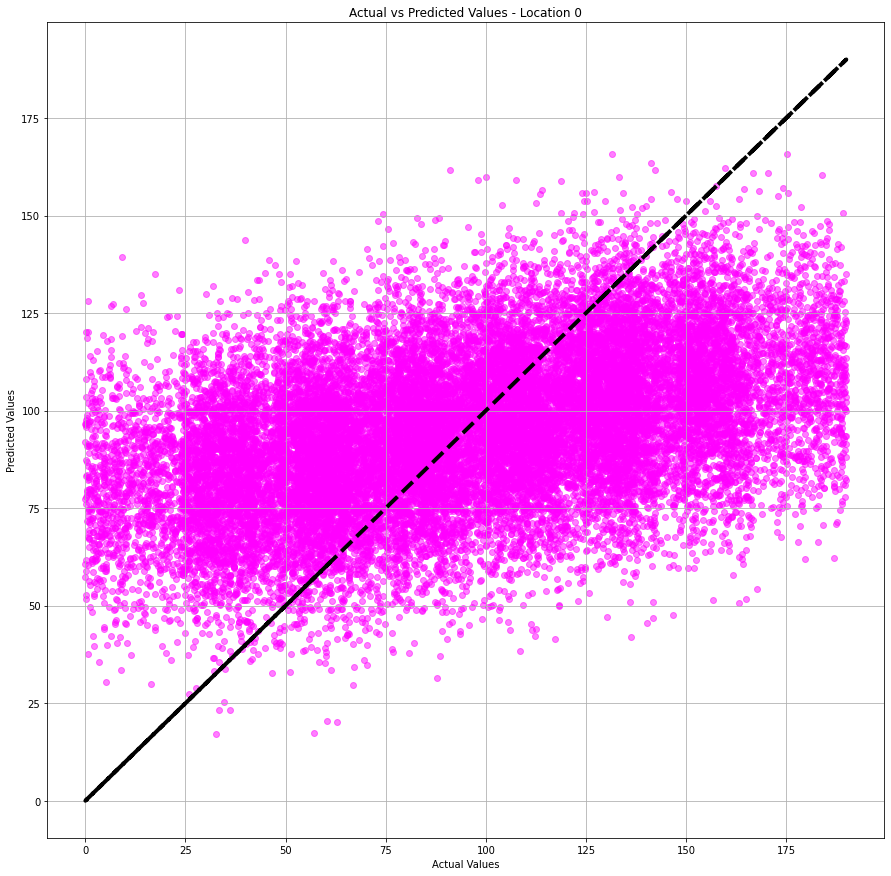

In [28]:
# Create a scatter plot to compare actual vs predicted
plt.figure(figsize=[15,15])
plt.scatter(target_valid_l2, predictions_l2, color='magenta', alpha=0.5)

# Add a line representing perfect predictions (y = x)
plt.plot(target_valid_l2, target_valid_l2, color='black',linestyle='dashed',linewidth=4)

# Add labels and title
plt.grid(True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Location 0')

# Show plot
plt.show()

In [29]:
#mean and rmse scores for each model
#location 0
print('Mean of Location 0 Predictions: ', predictions_l0.mean())
print('RMSE of Location 0 Model: ', mean_squared_error(target_valid_l0,predictions_l0,squared=False))
print()
#location 1
print('Mean of Location 1 Predictions: ', predictions_l1.mean())
print('RMSE of Location 1 Model: ', mean_squared_error(target_valid_l1,predictions_l1,squared=False))
print()
#location 2
print('Mean of Location 2 Predictions: ', predictions_l2.mean())
print('RMSE of Location 2 Model: ', mean_squared_error(target_valid_l2,predictions_l2,squared=False))

Mean of Location 0 Predictions:  92.59256778438035
RMSE of Location 0 Model:  37.5794217150813

Mean of Location 1 Predictions:  68.728546895446
RMSE of Location 1 Model:  0.893099286775617

Mean of Location 2 Predictions:  94.96504596800489
RMSE of Location 2 Model:  40.02970873393434


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
The high RMSE values in our models for Location 0 and 2 indicates that the average difference between the predicted values and the actual observed values is relatively large. We have a very low RMSE for Location 1 which indicates good performance as indicated by the scatter plot for this location

## Prepare for Profit Calculation 

In [30]:
#store values for calculations in variables
revenue_per_unit = 4500
budget = 100000000
wells = 200

In [31]:
volume = budget / (revenue_per_unit * wells)

In [32]:
volume

111.11111111111111

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">

According to our calculation, we have a volume of 111 barrels (x1000) we can use without a loss.
    
Compared to our averages of 92.6 (Location 0), 68.7 (Location 1), and 94.9 (Location 2), each location has a possibility of working for us.

## Profit Function

In [33]:
#reset indexes of target dataframes to match the indexes of the predictions dataframe
target_valid_l0 = target_valid_l0.reset_index(drop=True)
target_valid_l1 = target_valid_l1.reset_index(drop=True)
target_valid_l2 = target_valid_l2.reset_index(drop=True)

In [34]:
#function to predict profits
def profit(target, predictions, count):
    predictions = pd.Series(predictions)

    top_wells = predictions.sort_values(ascending=False).head(count).index
    
    total_reserves = target.loc[top_wells].sum()
    
    revenue = total_reserves * revenue_per_unit
    profit = revenue - budget 
    
    return profit

In [35]:
location_0_profit =  profit(target_valid_l0, predictions_l0, wells)
location_1_profit =  profit(target_valid_l1, predictions_l1, wells)
location_2_profit =  profit(target_valid_l2, predictions_l2, wells)

print("Location 0 Profit:",round(location_0_profit,2))
print("Location 1 Profit:", round(location_1_profit,2))
print("Location 2 Profit:", round(location_2_profit,2))

Location 0 Profit: 33208260.43
Location 1 Profit: 24150866.97
Location 2 Profit: 27103499.64


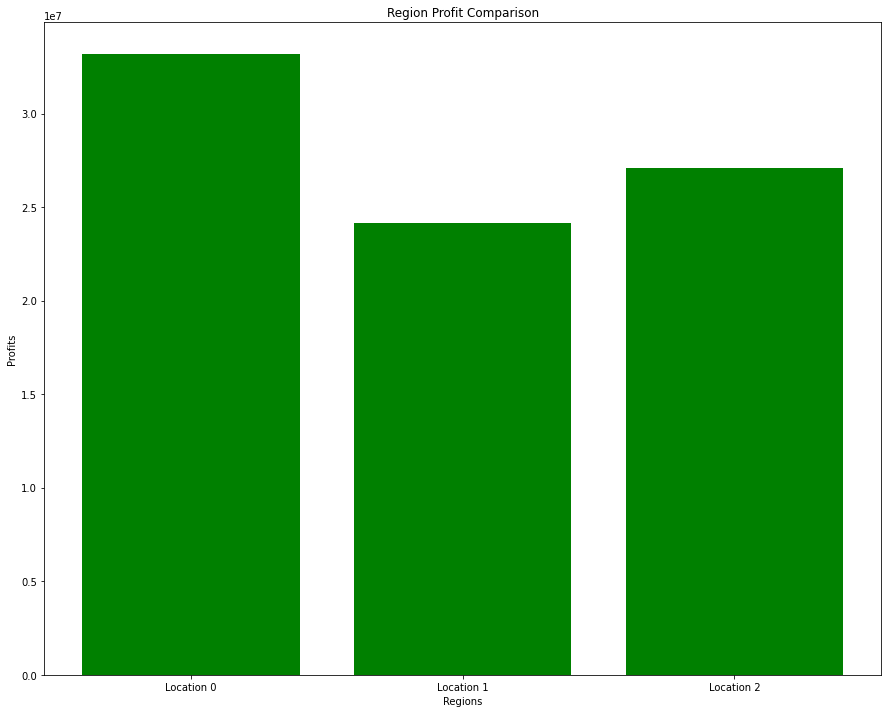

In [36]:
values = [location_0_profit,location_1_profit,location_2_profit]
x = ['Location 0','Location 1','Location 2']

plt.figure(figsize=[15,12])
plt.bar(x,values,color='green')

# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Profits')
plt.title('Region Profit Comparison')

# Show plot
plt.show()

#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
Based on our profit calculation, Location 0 would generate us the most profit. Although the mean and mean predictions of Location 2 were higher than the rest in terms of reserves, Location 0 is predicted to generate much more profit and should be considered the best choice for the new well.

## Calculate Risks and Profit for Each Region

In [37]:
#create bootstrap function that will take 1000 samples to find the distribution of profit and the risk of loss
def bootstrap(target,predictions,count):
    values = []
    state = np.random.RandomState(12345)
    predictions = pd.Series(predictions)
    
    for i in range(1000):
        target_subsample = target.sample(n=500,replace=True,random_state=state)
        prediction_subsample = predictions[target_subsample.index]
        values.append(profit(target_subsample,prediction_subsample,count))
        
    values = pd.Series(values)
    upper = values.quantile(0.975)
    lower = values.quantile(0.025)
    mean = values.mean()
    risk_of_loss = sum(values < 0) / len(values)
    
    return upper,lower,mean,risk_of_loss   

In [38]:
#call function on all regions
upper_l0,lower_l0,mean_l0,risk_of_loss_l0 = bootstrap(target_valid_l0,predictions_l0,wells)
upper_l1,lower_l1,mean_l1,risk_of_loss_l1 = bootstrap(target_valid_l1,predictions_l1,wells)
upper_l2,lower_l2,mean_l2,risk_of_loss_l2 = bootstrap(target_valid_l2,predictions_l2,wells)

In [39]:
#display results
print('Location 0 Average Profit: ',mean_l0)
print('Location 0 95 Quartile Profit: ',upper_l0)
print('Location 0 Risk of Loss: ',risk_of_loss_l0)
print()
print('Location 1 Average Profit: ',mean_l1)
print('Location 1 95 Quartile Profit: ',upper_l1)
print('Location 1 Risk of Loss: ',risk_of_loss_l1)
print()
print('Location 2 Average Profit: ',mean_l2)
print('Location 2 95 Quartile Profit: ',upper_l2)
print('Location 2 Risk of Loss: ',risk_of_loss_l2)

Location 0 Average Profit:  6007352.442611653
Location 0 95 Quartile Profit:  12311636.057914983
Location 0 Risk of Loss:  0.02

Location 1 Average Profit:  6652410.582210722
Location 1 95 Quartile Profit:  11976415.874631526
Location 1 Risk of Loss:  0.003

Location 2 Average Profit:  6155597.228409678
Location 2 95 Quartile Profit:  12306444.73941316
Location 2 Risk of Loss:  0.03


#### <span style="color:skyblue">Observations</span>
<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
Based on our results, although Location 2 would earn a greater average profit over Location 0, it's risk of loss is too high for us and needs to be excluded.
    
Location 0 has the lowest average profit, but has the highest 95 quartile profit and a relatively low risk of loss. Location 1, on the other hand, has a miniscule risk of loss percentage and can get us the highest average profit. Location 1 fell short in our profit calculation prediction with its top 200 wells, but after going through 1000 bootstrap samples, it looks as though **Location 1** is our safest choice and the 95 Percentile profit is not too far off from the other two regions.

## Conclusion

<div style="border-radius: 15px; border: 3px solid skyblue; padding: 15px;">
    
In this project, I prepared the data for modeling, trained Linear Regression models to get predictions for oil reserves, calculated the predicted profit from the top 200 oil wells from each region, and used the bootstrap technique to test 1000 samples and come up with our optimal region.
    
    
    - Location 1 is the optimal choice and should be the region selected for the new oil well.

Our Linear Regression model did a great job of predicting our target with a very low RMSE of 0.89. The profit prediction calculation was lower than the other two locations, but after further testing, we found that Location 1 could get us a higher average profit and virtually no risk of loss.